<img src="images/logo-64x64.png"/>
<h1>Reference Guide for Calysto Scheme</h1>

[Calysto Scheme](https://github.com/Calysto/calysto_scheme) is a real Scheme programming language, with full support for continuations, including call/cc. It can also use all Python libraries. Also has some extensions that make it more useful (stepper-debugger, choose/fail, stack traces), or make it better integrated with Python.

In Jupyter notebooks, because Calysto Scheme uses [MetaKernel](https://github.com/Calysto/metakernel/blob/master/README.rst), it has a fully-supported set of "magics"---meta-commands for additional functionality. This includes running Scheme in parallel. See all of the [MetaKernel Magics](https://github.com/Calysto/metakernel/blob/master/metakernel/magics/README.md).

Calysto Scheme is written in Scheme, and then translated into Python (and other backends). The entire functionality lies in a single Python file: https://github.com/Calysto/calysto_scheme/blob/master/calysto_scheme/src/Scheme.py However, you can easily install it (see below).

## Installation

You can install Calysto Scheme with Python3:

```
pip3 install --upgrade calysto-scheme --user -U
python3 -m calysto_kernel install --user
```

or in the system kernel folder with:

```
sudo pip3 install --upgrade calysto-scheme -U
sudo python3 -m calysto_kernel install
```

Change pip3/python3 to use a different pip or Python. The version of Python used will determine how Calysto Scheme is run.

Use it in the console, qtconsole, or notebook with IPython 3:

```
ipython console --kernel calysto_scheme
ipython qtconsole --kernel calysto_scheme
ipython notebook --kernel calysto_scheme
```

In addition to all of the following items, Calysto Scheme also has access to all of Python's builtin functions, and all of Python's libraries. For example, you can use `(complex 3 2)` to create a complex number by calling Python's complex function.

## Jupyter Enhancements

When you run Calysto Scheme in Jupyter (console, notebook, qtconsole, etc.) you get:

* TAB completions of Scheme functions and variable names
* display of rich media
* stepper/debugger
* magics (% macros)
* shell commands (! command)
* LaTeX equations
* LaTeX-style variables
* Python integration

### LaTeX-style variables

Calysto Scheme allows you to use LaTeX-style variables in code. For example, if you type:

```
\beta
```

with the cursor right after the 'a' in beta, and then press TAB, it will turn into the unicode character:

```
β
```

There are nearly 1300 different symbols defined (thanks to the Julia language) and documented here:

http://docs.julialang.org/en/release-0.4/manual/unicode-input/#man-unicode-input

Calysto Scheme may not implement all of those. Some useful and suggestive ones:

* \pi - π
* \Pi - Π
* \Sigma - Σ
* \_i - subscript i, such as vectorᵢ

In [1]:
(define α 67)

In [2]:
α

67

In [6]:
(define i 2)
(define vectorᵢ (vector-ref (vector 0 6 3 2) i))
vectorᵢ

3

### Rich media

In [2]:
(import "calysto.display")

(calysto)

In [3]:
(calysto.display.HTML "This is <b>bold</b>, <i>italics</i>, <u>underlined</u>.")

In [13]:
(import "calysto.graphics")

(calysto)

In [14]:
(define canvas (calysto.graphics.Canvas))

In [15]:
(define ball (calysto.graphics.Circle '(150 150) 100))

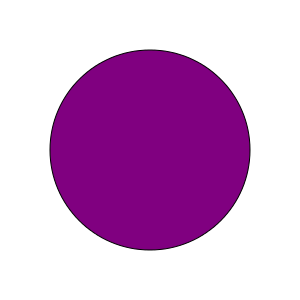

In [16]:
(ball.draw canvas)

### Shell commands

In [3]:
! ls /tmp

config-err-7810dL  emacs1000  unity_support_test.0  uploads
/home/dblank/Desktop/ProgLangBook
config-err-7810dL  emacs1000  unity_support_test.0  uploads


### Stepper/Debugger

Here is what the debugger looks like:

<img src="images/stepper_debugger.png">

It has breakpoints (click in left margin). You must press Stop to exit the debugger.

```scheme
%%debug

(begin
 (define x 1)
 (set! x 2)
)
```

### Python Integration

You can import and use any Python library in Calysto Scheme.

In addition, if you wish, you can execute expressions and statements in a Python environment:

In [10]:
(python-eval "1 + 2")

3

In [1]:
(python-exec 
"
def mypyfunc(a, b):
    return a * b
")

This is a shared environment with Scheme:

In [2]:
(mypyfunc 4 5)

20

You can use `func` to turn a Scheme procedure into a Python function, and `define!` to put it into the shared enviornment with Python:

In [4]:
(define! mypyfunc2 (func (lambda (n) n)))

In [5]:
(python-eval "mypyfunc2(34)")

34

# Differences Between Languages

## Major differences between Scheme and Python

1. In Scheme, double quotes are used for strings and may contain newlines
1. In Scheme, a single quote is short for (quote ...) and means "literal"
1. In Scheme, everything is an expression and has a return value
1. Python does not support macros (e.g., extending syntax)
1. In Python, "if X" is false if X is None, False, [], (,) or 0. In Scheme, "if X" is only false if X is #f or 0
1. Calysto Scheme uses continuations, not the call stack. However, for debugging there is a pseudo-stack when an error is raised. You can trun that off with (use-stack-trace #f)
1. Scheme procedures are not Python functions, but there are means to use one as the other.

## Major Differences Between Calysto Scheme and other Schemes

1. define-syntax works slightly differently
1. In Calysto Scheme, #(...) is short for '#(...)
1. Calysto Scheme is missing many standard functions (see list at bottom)
1. Calysto Scheme has a built-in amb operator called `choose`
1. For debugging there is a pseudo-stack when errors are raised in Calysto Scheme. You can trun that off with (use-stack-trace #f)

### Stack Trace

Calysto Scheme acts as if it has a call stack, for easier debugging. For example:

In [4]:
(define fact
    (lambda (n)
      (if (= n 1)
           q
           (* n (fact (- n 1))))))

In [5]:
(fact 5)


Traceback (most recent call last):
  File "In [5]", line 1, col 1, in 'fact'
  File "In [4]", line 5, col 17, in 'fact'
  File "In [4]", line 5, col 17, in 'fact'
  File "In [4]", line 5, col 17, in 'fact'
  File "In [4]", line 5, col 17, in 'fact'
  File "In [4]", line 4, col 12
RunTimeError: unbound variable 'q'



To turn off the stack trace on error:

```scheme
(use-stack-trace #f)
```
That will allow infinite recursive loops without keeping track of the "stack".

# Calysto Scheme Variables

## SCHEMEPATH
SCHEMEPATH is a list of search directories used with (load NAME). This is a reference, so you should append to it rather than attempting to redefine it.

In [6]:
SCHEMEPATH

("." "/usr/local/lib/python3.4/dist-packages/calysto_scheme/modules")

In [7]:
(set-cdr! (cdr SCHEMEPATH) (list "/var/modules"))

In [8]:
SCHEMEPATH

("." "/usr/local/lib/python3.4/dist-packages/calysto_scheme/modules" "/var/modules")

# Calysto Scheme Procedures

The following are implemented as macros and are syntactic sugar on simpler forms:

* let
* letrec
* let*
* and
* or
* cond
* case
* cases
* record-case
* define-datatype

## % (modulo)
(% arg0 arg1): modulo procedure for two arguments (aliases mod and modulo)

In [9]:
(% 5 2)

1

## * (multiply)
(* ...): multiplication procedure; multiplies all arguments

In [10]:
(* 2 3 4 5)

120

## + (addition)
(+ ...): addition procedure; adds all arguments

In [11]:
(+ 1 1 1)

3

## - (subtraction)
(- ...): subtraction procedure; subtracts all arguments

In [12]:
(- 5 4 2)

-1

## / (real division)
(/ ...): division procedure; divides all arguments

In [13]:
(/ 3 2)

3/2

## // (integer division)
(// arg0 arg1): quotient procedure for rationals/ints; divides arg0 by arg1 (aliases div and quotient)

In [14]:
(// 3 2)

1

## < (less than)
(< arg0 arg1): less-than procedure for two arguments

In [15]:
(< 6 7)

#t

## <= (less than or equals to)
(<= arg0 arg1): less-than or equal procedure for two arguments

In [16]:
(<= 5.5 5)

#f

## = (numeric equals)
(= arg0 arg1): numeric equality procedure for two arguments

In [17]:
(= 7 8)

#f

## > (greater than)
(> arg0 arg1): greater-than procedure for two arguments

In [18]:
(> 8 6)

#t

## >= (greater than or equals to)
(>= arg0 arg1): greater-than or equal procedure for two arguments

In [19]:
(>= 9 9)

#t

## abort
(abort) : aborts processing and returns to top level

In [20]:
(abort)

## abs
(abs value): absolute value procedure

In [21]:
(abs -67)

67

## and
(and ITEM ...)

`and` is defined via a macro (define-syntax).

In [22]:
(and #f (/ 6 0))

#f

## append
(append ...): append lists together into a single list

In [23]:
(append '(1 2 3) '(4 5))

(1 2 3 4 5)

## apply
(apply PROCEDURE '(args...)): apply the PROCEDURE to the args

In [24]:
(apply + '(1 2 3))

6

## assq
(assv KEY ((ITEM VALUE) ...)): look for KEY in ITEMs; return matching (ITEM VALUE) or #f if not found. Uses eq? to look for key. 

In [25]:
(assq 'key '((apple 1)(key 2)))

(key 2)

In [26]:
(assq 'key '((apple 1)(banana 2)))

#f

## assv
(assv KEY ((ITEM VALUE) ...)): look for KEY in ITEMs; return matching (ITEM VALUE) or #f if not found. Uses eqv? to look for key. 

In [27]:
(assv 'key '((apple 1)(key 2)))

(key 2)

## atom?
(atom? ITEM): return #t if ITEM is a atom, #f otherwise

In [28]:
(atom? (cons 1 2))

#f

In [29]:
(atom? 'a)

#t

## boolean?
(boolean? ITEM): return #t if ITEM is a boolean value

In [30]:
(boolean? #t)

#t

## caaaar
caaaar LIST): return the caaaar of the LIST

In [31]:
(caaaar '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

(hello there)

## caaadr
(caaadr LIST): return the caaadr of the LIST 

In [32]:
(caaadr '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

in

## caaar
(caaar LIST): return the caaar of the LIST

In [33]:
(caaar '(((((hello there) this is a test) what is this) 
          (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

((hello there) this is a test)

## caadar
(caadar LIST): return the caadar of the LIST

In [34]:
(caadar '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

((1 2 3) 4 5 6)

## caaddr
(caaddr LIST): return the caaddr of the LIST

In [35]:
(caaddr '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

the

## caadr
(caadr LIST): return the caadr of the LIST

In [36]:
(caadr '(((((hello there) this is a test) what is this) 
          (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

(in)

## caar
(caar LIST): return the caar of the LIST

In [37]:
(caar '(((((hello there) this is a test) what is this) 
         (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

(((hello there) this is a test) what is this)

## cadaar
(cadaar LIST): return the cadaar of the LIST

In [38]:
(cadaar '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

what

## cadadr
(cadadr LIST): return the cadadr of the LIST

In [39]:
(cadadr '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in) another) (the) list))

another

## cadar
(cadar LIST): return the cadar of the LIST

In [40]:
(cadar '(((((hello there) this is a test) what is this) 
          (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

(((1 2 3) 4 5 6) 7 8 9)

## caddar
(caddar LIST): return the caddar of the LIST

In [41]:
(caddar '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

another

## cadddr
(cadddr LIST): return the cadddr of the LIST

In [42]:
(cadddr '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

list

## caddr
(caddr LIST): return the (car (cdr (cdr LIST)))

In [43]:
(caddr '(((((hello there) this is a test) what is this) 
          (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

(the)

## cadr
(cadr LIST): return the (car (cdr LIST))

In [44]:
(cadr '(((((hello there) this is a test) what is this) 
         (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

((in))

## call-with-current-continuation
(call-with-current-continuation PROCEDURE): 

See call/cc for examples.

## call/cc
(call/cc PROCEDURE): call-with-current-continuation 

In [45]:
(* 10 (call/cc (lambda (k) 4)))

40

In [46]:
(* 10 (call/cc (lambda (k) (+ 1 (k 4)))))

40

In [47]:
(* 10 (call/cc (lambda (k) 
                 (+ 1 (call/cc 
                       (lambda (j) 
                         (+ 2 (j (k 5)))))))))

50

In [48]:
(* 10 (call/cc (lambda (k) 
                 (+ 1 (call/cc 
                       (lambda (j) 
                         (+ 2 (k (j 5)))))))))

60

## car
(car LIST) returns the first element of LIST

In [49]:
(car '(((((hello there) this is a test) what is this) 
        (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

((((hello there) this is a test) what is this) (((1 2 3) 4 5 6) 7 8 9) another item)

## case
(case ...)

In [50]:
(case 'thing1 (thing2 1) (thing1 2))

2

In [51]:
(case 'thing1 (thing2 1) ((thing1 thing3) 2))

2

In [52]:
(case 'thingx (thing2 1) ((thing1 thing3) 2) (else 3))

3

In [53]:
(case 'banana
    (apple 'no)
    ((cherry banana) 1 2 3)
    (else 'no))

3

## cases
(cases...)

See examples in define-datatype.

## cd
(cd [PATH]): get the current directory, or set it if PATH is given (alias current-directory)

In [54]:
(cd "/")

"/"

## cdaaar
(cdaaar LIST): return the cdaaar of the LIST

In [55]:
(cdaaar '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

(this is a test)

## cdaadr
(cdaadr LIST): return the cdaadr of the LIST

In [56]:
(cdaadr '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

()

## cdaar
(cdaar LIST): return the cdaar of the LIST

In [57]:
(cdaar '(((((hello there) this is a test) what is this) 
          (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

(what is this)

## cdadar
(cdadar LIST): return the cdadar of the LIST

In [58]:
(cdadar '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

(7 8 9)

## cdaddr
(cdaddr LIST): return the cdaddr of the LIST

In [59]:
(cdaddr '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

()

## cdadr
(cdadr LIST): return the cdadr of the LIST

In [60]:
(cdadr '(((((hello there) this is a test) what is this) 
          (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

()

## cdar
(cdar LIST): return the cdar of the LIST

In [61]:
(cdar '(((((hello there) this is a test) what is this) 
         (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

((((1 2 3) 4 5 6) 7 8 9) another item)

## cddaar
(cddaar LIST): return the cddaar of the LIST

In [62]:
(cddaar '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

(is this)

## cddadr
(cddadr LIST): return the cddadr of the LIST

In [63]:
(cddadr '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in) some other) (the) list))

(other)

## cddar
(cddar LIST): return the cddar of the LIST

In [64]:
(cddar '(((((hello there) this is a test) what is this) 
          (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

(another item)

## cdddar
(cdddar LIST): return the cdddar of the LIST

In [65]:
(cdddar '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

(item)

## cddddr
(cddddr LIST): return the cddddr of the LIST

In [66]:
(cddddr '(((((hello there) this is a test) what is this) 
           (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

()

## cdddr
(cdddr LIST): return the cddr of the LIST

In [67]:
(cdddr '(((((hello there) this is a test) what is this) 
          (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

(list)

## cddr
(cddr LIST): return the cddr of the LIST

In [68]:
(cddr '(((((hello there) this is a test) what is this) 
         (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

((the) list)

## cdr
(cdr LIST) returns rest of LIST after (car LIST)

In [69]:
(cdr '(((((hello there) this is a test) what is this) 
        (((1 2 3) 4 5 6) 7 8 9) another item) ((in)) (the) list))

(((in)) (the) list)

## char->integer
(char->integer CHAR): return associated number of CHAR 

In [70]:
(char->integer #\1)

49

## char->string
(char->string CHAR): return the character as a string

In [71]:
(char->string #\a)

"a"

## char-alphabetic?
(char-alphabetic? CHAR): return #t if CHAR is an alphabetic character, #f otherwise

In [72]:
(char-alphabetic? #\1)

#f

In [73]:
(char-alphabetic? #\a)

#t

## char-numeric?
(char-numeric? CHAR): return #t if CHAR is a whitespace character, #f otherwise

In [74]:
(char-numeric? #\2)

#t

## char-whitespace?
(char-whitespace? CHAR): return #t if CHAR is a whitespace character, #f otherwise

In [75]:
(char-whitespace? #\tab)

#t

## char=?
(char=? CHAR1 CHAR2): return #t if CHAR1 has the same values as CHAR2, #f otherwise

In [76]:
(char=? #\1 #\2)

#f

## char?
(char? ITEM): return #t if ITEM is a character, #f otherwise

In [77]:
(char? "h")

#f

## choose

This is the main interface to the non-deterministic interface. Using (choose options) combined with (require BOOLEAN-TEST) you can go back and select another option.

(choose OPTIONS): pick one, with ability to go back and pick another later

In [21]:
(define x (choose 1 2 3))

In [22]:
x

1

In [23]:
(require #f)

In [24]:
x

2

In [25]:
(require #f)

In [26]:
x

3

In [27]:
(require #f)

"no more choices"

In [28]:
x

3

You can solve many problems in a concise manner with choose/require. The following puzzle (taken from Dinesman 1968) is typical of a large class of simple logic puzzles:

> Baker, Cooper, Fletcher, Miller, and Smith live on different floors of an apartment house that contains only five floors. Baker does not live on the top floor. Cooper does not live on the bottom floor. Fletcher does not live on either the top or the bottom floor. Miller lives on a higher floor than does Cooper. Smith does not live on a floor adjacent to Fletcher's. Fletcher does not live on a floor adjacent to Cooper's. Where does everyone live?

In [78]:
(define floors2
  (lambda ()
    (let ((baker (choose 1 2 3 4 5)))
      (require (not (= baker 5)))
      (let ((fletcher (choose 1 2 3 4 5)))
        (require (not (= fletcher 5)))
        (require (not (= fletcher 1)))
        (let ((cooper (choose 1 2 3 4 5)))
          (require (not (= cooper 1)))
          (require (not (= (abs (- fletcher cooper)) 1)))
          (let ((smith (choose 1 2 3 4 5)))
            (require (not (= (abs (- smith fletcher)) 1)))
            (let ((miller (choose 1 2 3 4 5)))
              (require (> miller cooper))
              (require (distinct? (list baker cooper fletcher miller smith)))
              (list
                (list 'baker: baker)
                (list 'cooper: cooper)
                (list 'fletcher: fletcher)
                (list 'miller: miller)
                (list 'smith: smith)))))))))

In [79]:
(define distinct?
  (lambda (nums)
    (or (null? nums)
        (null? (cdr nums))
        (and (not (member (car nums) (cdr nums)))
             (distinct? (cdr nums))))))

In [80]:
(floors2)

((baker: 3) (cooper: 2) (fletcher: 4) (miller: 5) (smith: 1))

## cond
(cond CONDITIONS): CONDITIONS are composed of (TEST RETURN). cond will return the first RETURN where TEST is #t. `else` is considered to be #t.

In [81]:
(cond 
 (#f 1) 
 (else 2))

2

## cons
(cons ITEM1 ITEM2): return a list with ITEM1 as car and ITEM2 as cdr (ITEM2 is typically a list)

In [82]:
(cons 1 2)

(1 . 2)

## contains
(contains DICTIONARY ITEM): returns #t if DICTIONARY contains ITEM

In [83]:
(contains (dict '((a 1) (b 2))) 'b)

#t

## current-directory
(current-directory [PATH]): get the current directory, or set it if PATH is given (alias cd)

In [84]:
(current-directory)

"/"

In [7]:
(cd "/tmp")

"/tmp"

## current-environment
(current-environment): returns the current environment

In [85]:
(current-environment)

#<environment>

## current-time
(current-time): returns the current time as number of seconds since 1970-1-1

In [86]:
(current-time)

1470252063.6648307

## cut
(cut ARGS...): return to toplevel with ARGS

In [87]:
(cut 1 2 3)

(1 2 3)

In [88]:
(letrec ((loop (lambda (n) 
                 (if (= n 0) 
                     (set! var (cut 23)) 
                     (loop (- n 1)))))
         (var 0))
  (loop 10)
  var)

(23)

In [89]:
(define my-odd? 'undefined)
(define my-even? 'undefined)

(letrec
    ((odd (lambda (n) (if (= n 0) #f (even (- n 1)))))
     (even (lambda (n) (if (= n 0) #t (odd (- n 1))))))
  (set! my-odd? odd)
  (set! my-even? even))

In [90]:
(my-odd? 42)

#f

In [91]:
(my-even? 42)

#t

In [92]:
(my-odd? 43)

#t

In [93]:
(my-even? 43)

#f

## define
(define SYMBOL VALUE): bind a symbol to a value in the top-level-environment  
(define (SYMBOL ARGS) VALUE): the MIT-define

In [94]:
(define x 1)
x

1

In [1]:
(define (f a b) (+ a b)) ;; MIT-style (hidden lambda)
(f 5 6)

11

In [2]:
(define f
  (lambda (a b)
    (+ a b)))
(f 5 6)

11

In [95]:
(begin
 (define y 2)
 (print y)
)
(print y)

2
2


## define! 

Define an item in the shared environment with Python.

(define! NAME VALUE)

In [6]:
(define! myvar 42)

In [7]:
myvar

42

In [8]:
(python-eval "myvar")

42

## define-datatype
(define-datatype TYPE TYPE-TEST-NAME COMPONENTS): define a new datatype. Creates the constructors and tests for the datatype and components. For use with `cases`. See below for example. 

In [96]:
(define-datatype lc-exp lc-exp?
  (var-exp 
   (var symbol?))
  (lambda-exp 
   (bound-var symbol?)
   (body lc-exp?))
  (app-exp
   (rator lc-exp?)
   (rand lc-exp?)))

In [97]:
(var-exp 'a)

(var-exp a)

In [98]:
(lambda-exp 'a (var-exp 'a))

(lambda-exp a (var-exp a))

In [99]:
(app-exp (lambda-exp 'a (var-exp 'a)) (var-exp 'a))

(app-exp (lambda-exp a (var-exp a)) (var-exp a))

In [100]:
(define un-parse
  (lambda (exp)
    (cases lc-exp exp
       (var-exp (var) var)
       (lambda-exp (bound-var body) (list bound-var body))
       (app-exp (rator rand) (list rator rand)))))


In [101]:
(un-parse (var-exp 'a))

a

In [102]:
(un-parse (lambda-exp 'a (var-exp 'a)))

(a (var-exp a))

In [103]:
(un-parse (app-exp (lambda-exp 'a (var-exp 'a)) (var-exp 'a)))

((lambda-exp a (var-exp a)) (var-exp a))

## define-syntax
(define-syntax NAME RULES): a method for creating macros

In [104]:
(define-syntax time 
  [(time ?exp) (let ((start (current-time)))
                 ?exp
                 (- (current-time) start))])

In [105]:
(time (car '(1 2 3 4)))

0.0002892017364501953

In [106]:
;;---------------------------------------------------------------------
;; collect is like list comprehension in Python

(define-syntax collect
  [(collect ?exp for ?var in ?list)
   (filter-map (lambda (?var) ?exp) (lambda (?var) #t) ?list)]
  [(collect ?exp for ?var in ?list if ?condition)
   (filter-map (lambda (?var) ?exp) (lambda (?var) ?condition) ?list)])

(define filter-map
  (lambda (f pred? values)
    (if (null? values)
      '()
      (if (pred? (car values))
          (cons (f (car values)) (filter-map f pred? (cdr values)))
          (filter-map f pred? (cdr values))))))

In [107]:
(collect (* n n) for n in (range 10))

(0 1 4 9 16 25 36 49 64 81)

In [108]:
(collect (* n n) for n in (range 5 20 3))

(25 64 121 196 289)

In [109]:
(collect (* n n) for n in (range 10) if (> n 5))

(36 49 64 81)

In [110]:
;;---------------------------------------------------------------------
;; for loops

(define-syntax for
  [(for ?exp times do . ?bodies)
   (for-repeat ?exp (lambda () . ?bodies))]
  [(for ?var in ?exp do . ?bodies)
   (for-iterate1 ?exp (lambda (?var) . ?bodies))]
  [(for ?var at (?i) in ?exp do . ?bodies)
   (for-iterate2 0 ?exp (lambda (?var ?i) . ?bodies))]
  [(for ?var at (?i ?j . ?rest) in ?exp do . ?bodies)
   (for ?var at (?i) in ?exp do
     (for ?var at (?j . ?rest) in ?var do . ?bodies))])

(define for-repeat
  (lambda (n f)
    (if (< n 1)
      'done
      (begin
        (f)
        (for-repeat (- n 1) f)))))

(define for-iterate1
  (lambda (values f)
    (if (null? values)
      'done
      (begin
        (f (car values))
        (for-iterate1 (cdr values) f)))))

(define for-iterate2
  (lambda (i values f)
    (if (null? values)
      'done
      (begin
        (f (car values) i)
        (for-iterate2 (+ i 1) (cdr values) f)))))

In [111]:
(define matrix2d
  '((10 20)
    (30 40)
    (50 60)
    (70 80)))

(define matrix3d
  '(((10 20 30) (40 50 60))
    ((70 80 90) (100 110 120))
    ((130 140 150) (160 170 180))
    ((190 200 210) (220 230 240))))

In [112]:
(begin 
 (define hello 0)
 (for 5 times do (set! hello (+ hello 1)))
 hello
 )

5

In [113]:
(for sym in '(a b c d) do (define x 1) (set! x sym) x)

done

In [114]:
(for n in (range 10 20 2) do n)

done

In [115]:
(for n at (i j) in matrix2d do (list n 'coords: i j))

done

In [116]:
(for n at (i j k) in matrix3d do (list n 'coords: i j k))

done

In [117]:
(define-syntax scons
  [(scons ?x ?y) (cons ?x (lambda () ?y))])

(define scar car)

(define scdr
  (lambda (s)
    (let ((result ((cdr s))))
      (set-cdr! s (lambda () result))
      result)))

(define first
  (lambda (n s)
    (if (= n 0)
      '()
      (cons (scar s) (first (- n 1) (scdr s))))))

(define nth
  (lambda (n s)
    (if (= n 0)
      (scar s)
      (nth (- n 1) (scdr s)))))

(define smap
  (lambda (f s)
    (scons (f (scar s)) (smap f (scdr s)))))

(define ones (scons 1 ones))

(define nats (scons 0 (combine nats + ones)))

(define combine
  (lambda (s1 op s2)
    (scons (op (scar s1) (scar s2)) (combine (scdr s1) op (scdr s2)))))

(define fibs (scons 1 (scons 1 (combine fibs + (scdr fibs)))))

(define facts (scons 1 (combine facts * (scdr nats))))

(define ! (lambda (n) (nth n facts)))

In [118]:
(! 5)

120

In [119]:
(nth 10 facts)

3628800

In [120]:
(nth 20 fibs)

10946

In [121]:
(first 30 fibs)

(1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040)

## dict
(dict '((KEY VALUE)...)): creates a Python dictionary
(dict '((KEY : VALUE)...)): optional syntax

In [122]:
(dict '((a 1)(b 2)))

{a: 1, b: 2}

In [1]:
(dict '((a : 1)(b : 2)))

{a: 1, b: 2}

## dir
(dir [ITEM]): return items in environment, or, if ITEM is given, the items in module

In [123]:
(dir)

(! % * + - / // < <= = > >= SCHEMEPATH abort abs and app-exp append apply assq assv atom? boolean? caaaar caaadr caaar caadar caaddr caadr caar cadaar cadadr cadar caddar cadddr caddr cadr call-with-current-continuation call/cc car case cases cd cdaaar cdaadr cdaar cdadar cdaddr cdadr cdar cddaar cddadr cddar cdddar cddddr cdddr cddr cdr char->integer char->string char-alphabetic? char-numeric? char-whitespace? char=? char? collect combine cond cons contains current-directory current-environment current-time cut define-datatype dict dir display distinct? div eq? equal? eqv? error eval eval-ast even? exit fact facts fibs filter-map first float floors2 for for-each for-iterate1 for-iterate2 for-repeat format get get-stack-trace getitem globals hello import import-as import-from int integer->char iter? lambda-exp lc-exp? length let let* letrec list list->string list->vector list-ref list? load load-as make-set make-vector map matrix2d matrix3d max member memq memv min mod modulo my-even? 

In [124]:
(dir complex)

(__abs__ __add__ __bool__ __class__ __delattr__ __dir__ __divmod__ __doc__ __eq__ __float__ __floordiv__ __format__ __ge__ __getattribute__ __getnewargs__ __gt__ __hash__ __init__ __int__ __le__ __lt__ __mod__ __mul__ __ne__ __neg__ __new__ __pos__ __pow__ __radd__ __rdivmod__ __reduce__ __reduce_ex__ __repr__ __rfloordiv__ __rmod__ __rmul__ __rpow__ __rsub__ __rtruediv__ __setattr__ __sizeof__ __str__ __sub__ __subclasshook__ __truediv__ conjugate imag real)

## display
(display ITEM): display the ITEM as output

In [125]:
(display "hello")

hello

## div
(div arg0 arg1): quotient procedure for rationals/ints; divides arg0 by arg1 (aliases // and quotient)

In [126]:
(div 5 3)

1

## eq?
(eq? ITEM1 ITEM2): return #t if ITEM1 is eq to ITEM2, #f otherwise

In [127]:
(eq? '(1 2) '(1 2))

#f

## equal?
(equal? ITEM1 ITEM2): return #t if ITEM1 is equal to ITEM2, #f otherwise

In [128]:
(equal? '(1 2) '(1 2))

#t

## eqv?
(eqv? ITEM1 ITEM2): return #t if ITEM1 and ITEM2 have the same value

In [129]:
(eqv? '(1 2) '(1 2))

#f

## error
(error NAME FORMATTED-MESSAGE ARGS...): create an exception in NAME with MESSAGE

In [130]:
(error "procedure-name" "What is ~a" 'huh?)


Traceback (most recent call last):
  File "In [130]", line 1, col 1, in 'error'
  File "In [130]", line 1, col 1
RunTimeError: Error in 'procedure-name': What is huh?



## eval
(eval LIST): evaluates the LIST as a Scheme expression

In [131]:
(eval '(+ 1 1))

2

## eval-ast
(eval-ast AST): evaluates the Abstract Syntax Tree as a Scheme expression (see parse and parse-string)

In [132]:
(eval-ast (parse-string "(+ 1 2)"))

3

## even?
(even? NUMBER): returns #t if NUMBER is odd, #f otherwise

In [133]:
(even? 12121)

#f

## exit
(exit): 

In [134]:
(exit)

(exiting the interpreter)

## float
(float NUMBER): return NUMBER as a floating point value

In [135]:
(float 34)

34.0

## for-each
(for-each PROCEDURE LIST): apply PROCEDURE to each item in LIST; like `map` but don't return results

In [136]:
(for-each (lambda (n) (print n)) '(3 4 5))

3
4
5


## format
(format STRING ITEM ...): format the string with ITEMS as arguments

In [137]:
(format "This uses formatting ~a ~s ~%" 'apple 'apple)

"This uses formatting apple apple \n"

## func

Turns a lambda into a Python function.

(func (lambda ...))

In [9]:
(func (lambda (n) n))

<function dlr_func.<locals>.f at 0x7f7733b9c6a8>

## get

Get an item from a loaded module/environment.

(get ENVIRONMENT ITEM)

In [138]:
(load-as "test_all.ss" 'test)

Scheme Unit tests
................................................................................................................................................................................................................................................

Results:
    right = 240
    wrong = 0 
Time: 4.101226091384888 seconds


In [139]:
((get 'test 'verify) "test-name" 1 = 1)

.

In [140]:
((get 'test '!) 5)

120

## get-stack-trace
(get-stack-trace): return the current stack trace

In [141]:
(get-stack-trace)

((app-aexp (lexical-address-aexp 0 74 get-stack-trace ("In [141]" 1 2 2 1 16 16)) () ("In [141]" 1 1 1 1 17 17)))

## getitem
(getitem DICTIONARY ITEM): returns the VALUE of DICTIONARY[ITEM]  
(getitem vector ITEM): returns the VALUE of VECTOR[ITEM]  
(getitem OBJECT "ATTRIBUTE"): return the Python ATTRIBUTE of an OBJECT

In [1]:
(getitem #(1 2 3) 0)

1

In [2]:
(getitem (dict '((a 100))) 'a)

100

In [3]:
(getitem (globals) "keys")

<built-in method keys of dict object at 0x7f0338b1e648>

## globals
(globals): get global Python environment

In [12]:
(define-syntax collect
  [(collect ?exp for ?var in ?list)
   (filter-map (lambda (?var) ?exp) (lambda (?var) #t) ?list)]
  [(collect ?exp for ?var in ?list if ?condition)
   (filter-map (lambda (?var) ?exp) (lambda (?var) ?condition) ?list)])

(define filter-map
  (lambda (f pred? values)
    (if (null? values)
      '()
      (if (pred? (car values))
          (cons (f (car values)) (filter-map f pred? (cdr values)))
          (filter-map f pred? (cdr values))))))

(collect x for x in (map (lambda (n) n) ((getitem (globals) "keys"))) if (string<? x "b"))

("apply_proc" "apply_prim" "GLOBALS" "assignment_q_hat" "apply_macro" "_staruse_stack_trace_star" "LessThan" "ap_reg" "assq_prim" "append_all" "ap1_reg" "association_q" "association_q_hat" "adatum_reg" "apply_action" "amacro_error" "append_prim" "action_reg" "__doc__" "abs_prim" "apair_q" "atom_tag" "_starreader_generates_annotated_sexps_q_star" "append" "_starneed_newline_star" "Symbol" "apply_cont2" "assv_prim" "application_q_hat" "aparse_sexps" "__spec__" "__version__" "REP_fail" "apply_fail" "Apply" "apply_star" "Range" "apply_cont" "abort_prim" "anything_q" "GreaterThanEqual" "DebugException" "__loader__" "GreaterThan" "Char" "apply_cont3" "__name__" "aparse" "PY3" "CHARS" "atom_q_prim" "__builtins__" "SYMBOLS" "apply_handler" "app_aexp" "SCHEMEPATH" "args_reg" "append2" "apply_sub_hat" "add_binding" "Vector" "apply_comparison" "annotated_q" "all_numeric_q" "avar_reg" "aclauses_reg" "_starlast_fail_star" "_startracing_on_q_star" "Map" "association_aexp" "_startokens_left_star" "as

## import

Use import, import-from, and import-as to load Python libraries. Use load and load-as to load Scheme files.

(import MODULE...): import host-system modules; MODULEs are strings

In [145]:
(try 
    (import "math")
(catch e e 
    (import "Graphics")))

(math)

In [146]:
(math.cos 0.6)

0.8253356149096783

## import-as

Use import, import-from, and import-as to load Python libraries. Use load and load-as to load Scheme files.

(import-as MODULE NAME): import a host-system module; MODULE is a string, and NAME is a symbol or string. Use * for NAME to import into toplevel environment

In [147]:
(import-as "math" 'm)

(m)

In [148]:
(m.sin 0.6)

0.5646424733950354

## import-from

Use import, import-from, and import-as to load Python libraries. Use load and load-as to load Scheme files.

(import-from MODULE NAME...): import from host-system module; MODULE is a string, and NAME is a symbol or string

In [149]:
(import-from "math" "sin" "cos")

(sin cos)

In [150]:
(sin .5)

0.479425538604203

## int
(int NUMBER): return NUMBER as an integer

In [151]:
(int 4.5)

4

## integer->char
(integer->char INTEGER): return the assocated character of INTEGER

In [152]:
(integer->char 78)

#\N

## iter?
(iter? ITEM): return #t if ITEM is a iterator, #f otherwise

In [153]:
(iter? 3)

#f

In [154]:
(define g (globals))
(iter? (g.keys))

#t

## lambda

(lambda (VARIABLE...) BODY)  
(lambda VARIABLE BODY) - called mu-lambda

In [13]:
(lambda (n) n) ;; identity function

#<procedure>

In [14]:
((lambda (i) i) 89)

89

### mu-lambda

In [155]:
((lambda x x) 1 2 3 4 5)

(1 2 3 4 5)

In [156]:
((lambda (x . y) (list x y)) 1 2 3 4 5)

(1 (2 3 4 5))

In [157]:
((lambda (a b . z) (list a b z)) 1 2 3 4 5)

(1 2 (3 4 5))

In [158]:
((lambda (a b . z) (list a b z)) 1 2 3)

(1 2 (3))

In [159]:
((lambda (a b . z) (list a b z)) 1 2)

(1 2 ())

In [160]:
(try ((lambda (a b . z) (list a b z)) 1)
   (catch e e "not enough arguments given"))

"not enough arguments given"

## length
(length LIST): returns the number of elements in top level of LIST

In [161]:
(length '(1 2 3 4))

4

## let
(let ((VARIABLE VALUE)...) BODY): define variables with a scope in BODY

In [162]:
(let ((v (vector 1 2 3))) 
  (vector-set! v 2 'a) 
  v)

#3(1 2 a)

In [163]:
(try (let loop ((n 5))
            n
            (if (= n 0)
                (raise 'blastoff!))
            (loop (- n 1)))
(catch e e))

blastoff!

## let*
(let* ...)

In [164]:
(let* ((a 1) (b a))
  b)

1

## letrec
(letrec ...)

In [165]:
(letrec 
  ((fact (lambda (n)
           (if (= n 1)
               1
               (* (fact (- n 1)) n)))))
  (fact 5))

120

## list
(list ITEM ...): returns a list composed of all of the items

In [166]:
(list 1 2 3 4)

(1 2 3 4)

## list->string
(list->string LIST): returns the LIST as a string

In [167]:
(list->string '(#\1 #\2))

"12"

## list->vector
(list->vector LIST): returns the LIST as a vector

In [168]:
(list->vector '(1 2 3))

#3(1 2 3)

## list-ref
(list-ref LIST INDEX): returns the item in LIST at INDEX (zero-based)

In [169]:
(list-ref '(1 2 3) 0)

1

## list?
(list? ITEM): return #t if ITEM is a list, #f otherwise

In [170]:
(list? 123)

#f

## load
(load FILENAME...): loads the given FILENAMEs

In [171]:
(load "sllgen.ss")

sllgen.ss 2000-09-25 11:48


## load-as
(load-as FILENAME MODULE-NAME): load the filename, putting items in MODULE-NAME namespace

In [172]:
(load-as "sllgen.ss" 'sll)

sllgen.ss 2000-09-25 11:48


In [173]:
sll

#<environment>

## make-set
(make-set LIST): returns a list of unique items from LIST

In [174]:
(make-set '(1 2 3 1 2 3))

(1 2 3)

## make-vector
(make-vector LENGTH): returns a vector of length LENGTH

In [175]:
(make-vector 8)

#8(0 0 0 0 0 0 0 0)

## map
(map PROCEDURE LIST...): apply PROCEDURE to each element of LIST; like for-each but returns results.

`map` and `for-each` can iterate over lists and Python iterators.

In [176]:
(map (lambda (n) (+ n 2)) '(3 4 5))

(5 6 7)

In [177]:
(map (lambda (n) (print n)) '(3 4 5))

3
4
5


(<void> <void> <void>)

## max
(max ...): returns the maximum value from the list of values

In [178]:
(max (range 10))

9

## member
(member ITEM LIST): return LIST if ITEM in top level of LIST

In [179]:
(member 10 (range 10))

#f

In [180]:
(member 0 (range 10))

(0 1 2 3 4 5 6 7 8 9)

In [181]:
(member "b" '("a" "b" "c"))

("b" "c")

## memq
(memq ITEM LIST): check for member using eq? in LIST. Returns entire list if found.

In [182]:
(memq 'b '(a b c))

(b c)

In [6]:
(memq 2 '(1.0 2.0 3.0))

#f

## memv
(memv ITEM LIST): check for member using eqv? in LIST. Returns entire list if found.

In [5]:
(memv 2 '(1.0 2.0 3.0))

(2.0 3.0)

## min
(min ...): returns the minimum value from the list of values

In [184]:
(min (range 10))

0

## mod
(mod arg0 arg1): modulo procedure for two arguments (aliases % and modulo)

In [185]:
(mod 7 3)

1

## modulo
(modulo arg0 arg1): modulo procedure for two arguments (aliases mod and %)

In [186]:
(modulo 7 3)

1

## newline
(newline): displays a new line in output

In [187]:
(newline)

## not
(not ITEM): returns the boolean not of ITEM; ITEM is only #t when #t, otherwise #f

In [188]:
(not #f)

#t

In [189]:
(not #t)

#f

## null?
(null? ITEM): return #t if ITEM is empty list, #f otherwise

In [190]:
(null? '())

#t

In [191]:
(null? '(1))

#f

## number->string
(number->string NUMBER): return NUMBER as a string

In [192]:
(number->string 76.23)

"76.23"

## number?
(number? ITEM): return #t if ITEM is a number, #f otherwise

In [193]:
(number? 7623.3)

#t

## odd?
(odd? NUMBER): returns #t if NUMBER is even, #f otherwise

In [194]:
(odd? 65)

#t

## or
(or ITEM...)

`or` is defined via a macro (define-syntax).

In [195]:
(or #t (/ 8 0))

#t

## pair?
(pair? ITEM): returns #t if ITEM is a cons cell (a proper or improper list). Note that the empty list is a symbol, but not an actual list.

In [196]:
(pair? '())

#f

In [15]:
(pair? (cons 1 2))

#t

## parse
(parse LIST): parse a list; returns Abstract Syntax Tree (AST)

In [197]:
(parse '(+ 2 3))

(app-aexp (lexical-address-aexp 0 1 + none) ((lit-aexp 2 none) (lit-aexp 3 none)) none)

## parse-string
(parse-string STRING): parse a string; returns Abstract Syntax Tree (AST)

In [198]:
(parse-string "(+ 1 2)")

(app-aexp (lexical-address-aexp 0 1 + (stdin 1 2 2 1 2 2)) ((lit-aexp 1 (stdin 1 4 4 1 4 4)) (lit-aexp 2 (stdin 1 6 6 1 6 6))) (stdin 1 1 1 1 7 7))

## print
(print ITEM): output the ITEM as if by write (alias for write)

In [199]:
(print "this string")

"this string"


## printf
(printf FORMAT ARGS...): formatted print. Uses standard scheme formatting symbols:

* ~a - shown as if by display
* ~s - shown as if by write
* ~% - newline

In [200]:
(printf "many possible ~a ~s" 'things "and etc")

many possible things "and etc"

## procedure?
(procedure? ITEM): return #t if ITEM is a procedure, #f otherwise

In [201]:
(procedure? procedure?)

#t

## property

Create a Python property. Under development for creating Python classes from Scheme.

(property NAME VALUE): 

## python-eval
(python-eval PYTHON-EXPRESSION [globals [locals]]): return the result of evaluating PYTHON-EXPRESSION string

In [202]:
(python-eval "1 + 4")

5

## python-exec
(python-exec PYTHON-STATEMENTS [globals [locals]]): return the result of evaluating PYTHON-STATEMENTS string

In [203]:
(python-exec 
"
x = 1
print(x)
")

1


## quasiquote
(quasiquote LIST): quasiquote allows commas in front of expressions in a list which will be evaluated

In [204]:
`(list ,(+ 1 2) 4)

(list 3 4)

## quote

(quote ITEM): treat ITEM as a literal (data). Can also be written as the single-quote mark

In [205]:
(quote (1 2 3))

(1 2 3)

In [206]:
'(1 2 3)

(1 2 3)

In [207]:
'#(1 2 3)

#3(1 2 3)

In [208]:
`#(1 ,(+ 2 4))

#2(1 6)

## quotient
(quotient arg0 arg1): quotient procedure for rationals/ints; divides arg0 by arg1 (aliases // and div)

In [209]:
(quotient 7 3)

2

## rac
(rac LIST): return the last item of LIST

In [210]:
(rac '(1 2 3))

3

## range
(range END), (range START END), or (RANGE START END STEP): (all integers)

In [211]:
(range 10)

(0 1 2 3 4 5 6 7 8 9)

## rational
(rational NUMERATOR DENOMINTAOR): return a rational number

In [212]:
(rational 3 4)

3/4

## rdc
(rdc LIST): return everything but last item in LIST

In [213]:
(rdc '(1 2 3))

(1 2)

## raise

See try/catch/finally for examples.

## read-string
(read-string LIST): returns low-level format used in read. Not generally useful.

In [214]:
(read-string '(1 2 3))

((pair) ((atom) 1 (stdin 1 2 2 1 2 2)) ((pair) ((atom) 2 (stdin 1 4 4 1 4 4)) ((pair) ((atom) 3 (stdin 1 6 6 1 6 6)) ((atom) () none) none) none) (stdin 1 1 1 1 7 7))

## record-case
(record-case RECORD CASES): match a record to a sequence of CASES

In [215]:
(record-case (cons 'banana (cons 'orange (cons (* 2 3) '())))
    (apple (a b c) (list c b a r))
    ((cherry banana) (a . b) (list b a 5))
    ((orange) () 'no)
    (else 2 3 4))


((6) orange 5)

## remainder
(remainder NUMBER1 NUMBER2): returns the remainder after dividing NUMBER1 by NUMBER2

In [216]:
(remainder 6 3)

0

## require
(require EXPR): require something to be true. Used with (choose)

See choose for example.

## reset-toplevel-env
(reset-toplevel-env): reset the toplevel environment

In [217]:
(reset-toplevel-env)

## reverse
(reverse LIST): return the top-level items in a list in reverse order.

In [218]:
(reverse '(1 2 3))

(3 2 1)

## round
(round NUMBER): round NUMBER to the nearest integer (may return float)

In [219]:
(round 34.7)

35

## set!
(set! VARIABLE VALUE): set a variable to a value

Note that for objects, you currently need to:

```scheme
(setitem OBJ "PROPERTY" VALUE)

In [6]:
(define x 12)
(set! x 13)

## set-car!
(set-car! LIST ITEM): set the car of LIST to be ITEM

In [220]:
(define a '(1 2 3))
(set-car! a 7)
a

(7 2 3)

## set-cdr!
(set-cdr! LIST ITEM): set the car of LIST to be ITEM (which is typically a list)

In [221]:
(define a '(1 2 3))
(set-cdr! a '(4 5))
a

(1 4 5)

## setitem
(setitem DICTIONARY ITEM VALUE): sets DICTIONARY[ITEM] with VALUE and returns it  
(setitem VECTOR POSITION VALUE): sets VECTOR[POSITION] with VALUE and returns it  
(setitem OBJ "PROPERTY" VALUE): sets OBJ.PROPERY with VALUE, and returns it

In [2]:
(import "conx")

(conx)

In [3]:
(setitem conx "x" 42)

42

In [4]:
(getitem conx "x")

42

In [5]:
conx.x

42

In [222]:
(define d (dict '((a 1)(b 2))))
(setitem d 'b 6)
d

{a: 1, b: 6}

## snoc
(snoc ITEM LIST): cons the ITEM onto the end of LIST

In [223]:
(snoc '0 '(1 2 3))

(1 2 3 0)

## sort
(sort PROCEDURE LIST): sort the list using PROCEDURE to compare items

In [224]:
(sort (lambda (a b) (< a b)) '(9 6 2 3 1 2 0))

(0 1 2 2 3 6 9)

In [225]:
(sort < '(9 6 2 3 1 2 0))

(0 1 2 2 3 6 9)

## sqrt
(sqrt NUMBER): return the square root of NUMBER

In [226]:
(sqrt 9)

3.0

## string
(string ITEM): returns ITEM as a string

In [227]:
(string #\tab)

"\t"

## string->list
(string->list STRING): string STRING as a list of characters

In [228]:
(string->list "hello world!")

(#\h #\e #\l #\l #\o #\space #\w #\o #\r #\l #\d #\!)

## string->number
(string->number STRING): return STRING as a number

In [229]:
(string->number "23.3")

23.3

## string->symbol
(string->symbol STRING): return STRING as a symbol

In [230]:
(string->symbol "apple")

apple

## string-append
(string-append STRING1 STRING2): append two strings together

In [231]:
(string-append "abc" "123")

"abc123"

## string-length
(string-length STRING): returns the length of a string

In [232]:
(string-length "how long?")

9

## string-ref
(string-ref STRING INDEX): return the character of STRING at position INDEX

In [233]:
(string-ref "0123" 1)

#\1

## string-split
(string-split STRING CHAR): return a list with substrings of STRING where split by CHAR

In [234]:
(string-split "1234" #\2)

("1" "34")

## string<?
(string<? STRING1 STRING2): compare two strings to see if STRING1 is less than STRING2

In [235]:
(string<? "apple" "zebra")

#t

## string=?
(string=? STRING1 STRING2): return #t if STRING1 is the same as STRING2, #f otherwise

In [236]:
(string=? "apple" "apple")

#t

## string?
(string? ITEM): return #t if ITEM is a string, #f otherwise

In [237]:
(string? 'apple)

#f

## substring
(substring STRING START [END]): return the substring of STRING starting with position START and ending before END. If END is not provided, it defaults to the length of the STRING

In [238]:
(substring "01234" 1 3)

"12"

## symbol
(symbol STRING): turn STRING into a symbol

In [239]:
(symbol "apple")

apple

## symbol->string
(symbol->string SYMBOL): return SYMBOL as a string

In [240]:
(symbol->string 'apple)

"apple"

## symbol?
(symbol? ITEM): return #t if ITEM is a symbol, #f otherwise

In [241]:
(symbol? "apple")

#f

## try/catch/finally
(try ... catch ...): attempt to execute an expression, with a method of catching errors, and running code at end regardless of outcome. Note that the finally clause runs, but the return value comes from try or catch. See below for examples.

In [28]:
(try 
    (/ 1 0)
(catch e e 
    (printf "Can't do that!")))

Can't do that!

In [29]:
(try 3)

3

In [30]:
(try 3 
(finally (define did-it #t)))

3

In [31]:
did-it

#t

In [32]:
(try (/ 3 0)
     (catch e e)
     (finally (print 'yes 4)))

yes
4


("RunTimeError" "division by zero" "In [32]" 1 6 (("In [32]" 1 6 /)))

In [33]:
(try (raise 'yes) 
(catch e e))

yes

In [34]:
(try (try (raise 'yes)) 
(catch e e))

yes

In [35]:
(try (try (begin 'one (raise 'oops) 'two)) 
(catch e e))

oops

In [36]:
(* 10 (try (begin 'one (raise 'oops) 'two)
      (catch ex 3 4)))

40

In [37]:
(* 10 (try (begin 'one 'two 5)
      (catch ex 3 4)))

50

In [38]:
(* 10 (try (begin 'one (raise 'oops) 5)
      (catch ex (list 'ex: ex) 4)))

40

In [39]:
(try (* 10 (try (begin 'one (raise 'oops) 5)
           (catch ex (list 'ex: ex) (raise ex) 4))) 
(catch e e))

oops

In [40]:
(try (* 10 (try (begin 'one (raise 'oops) 5)
              (catch ex (list 'ex: ex) (raise ex) 4)
              (finally (print 'two 7))))
     (catch e e))

two
7


oops

In [41]:
(try (* 10 (try (begin 'one (raise 'oops) 5)
              (catch ex (list 'ex: ex) (raise 'bar) 4)))
   (catch x 'hello 77))

77

In [42]:
(try 3 
     (finally (print 'hi 4)))

hi
4


3

In [43]:
(try (div 10 0) 
     (catch e (cadr e)))

"division by zero"

In [44]:
(try (let ((x 
            (try (div 10 0)))) x) 
     (catch e (cadr e)))

"division by zero"

In [45]:
(let ((x (try (div 10 2) 
              (catch e -1)))) x)

5

In [46]:
(let ((x 
       (try (div 10 0) 
            (catch e -1)))) x)

-1

In [47]:
(let ((x (try (div 10 2) 
              (catch e -1) 
              (finally (print 'closing-files 42)))))  x)

closing-files
42


5

In [48]:
(let ((x (try (div 10 0) 
              (catch e -1) 
              (finally (print 'closing-files 42)))))  x)

closing-files
42


-1

In [49]:
(let ((x (try (div 10 2) 
              (finally (print 'closing-files 42)))))  x)

closing-files
42


5

In [50]:
(try (let ((x (try (div 10 0) 
                   (catch e -1 (raise 'foo)) 
                   (finally (print 'closing-files 42)))))  x) (catch e e))

closing-files
42


foo

In [51]:
(try (let ((x (try (div 10 0)
        (catch e -1 (raise 'foo))
        (finally (print 'closing-files (raise 'ack) 42)))))
x) (catch e e))

ack

In [52]:
(try (let ((x (try (div 10 0)
             (catch e -1 (raise 'foo))
             (finally (print 'closing-files (raise 'ack) 42)))))
    x)
(catch e (if (equal? e 'ack) 99 (raise 'doug)))
(finally (print 'closing-outer-files)))

closing-outer-files


99

In [53]:
(try (try (let ((x (try (div 10 0)
             (catch e -1 (raise 'foo))
             (finally 'closing-files (raise 'ack) 42))))
    x)
(catch e (if (equal? e 'foo) 99 (raise 'doug)))
(finally (print 'closing-outer-files))) (catch e e))


closing-outer-files


doug

## typeof
(typeof ITEM): returns type of ITEM

In [54]:
(typeof 23.4)

<class 'float'>

## unparse
(unparse AST): given an AST, turn it back into Scheme code

In [267]:
(unparse (parse '(+ 1 2)))

(+ 1 2)

## unparse-procedure
(unparse-procedure PROCEDURE): given a procedure, show the body as Scheme code

In [268]:
(unparse-procedure (lambda (x) (+ x 1)))

(+ x 1)

## use-lexical-address
(use-lexical-address [BOOLEAN]): get lexical-address setting, or set it on/off if BOOLEAN is given

In [269]:
(use-lexical-address #t)

## use-stack-trace
(use-stack-trace BOOLEAN): set stack-trace usage on/off

In [270]:
(use-stack-trace #t)

## use-tracing
(use-tracing [BOOLEAN]): get tracing setting, or set it on/off if BOOLEAN is given

In [271]:
(use-tracing)

#f

In [272]:
(use-tracing #t)
(define fact
    (lambda (n)
      (if (= n 1)
           1
           (* n (fact (- n 1))))))
(fact 1)
(use-tracing #f)

call: (define fact (lambda (n) (if (= n 1) 1 (* n (fact (- n 1))))))
call: (lambda (n) (if (= n 1) 1 (* n (fact (- n 1)))))
(lambda (n) (if (= n 1) 1 (* n (fact (- n 1))))) => #<procedure>
(define fact (lambda (n) (if (= n 1) 1 (* n (fact (- n 1)))))) => <void>
call: (fact 1)
call: 1
1 => 1
call: fact
fact => #<procedure>
call: (if (= n 1) 1 (* n (fact (- n 1))))
call: (= n 1)
call: n
n => 1
call: 1
1 => 1
call: =
= => #<procedure>
(= n 1) => #t
call: 1
1 => 1
(if (= n 1) 1 (* n (fact (- n 1)))) => 1
(fact 1) => 1
call: (use-tracing #f)
call: #f
#f => #f
call: use-tracing
use-tracing => #<procedure>
(use-tracing #f) => <void>


## vector
(vector [ITEMS]...): return ITEMs as a vector

In [273]:
(vector 1 2 (+ 3 3))

#3(1 2 6)

## vector->list
(vector->list VECTOR): return VECTOR as a list

In [274]:
(vector->list #(1 2 3))

(1 2 3)

## vector-length
(vector-length VECTOR): returns length of VECTOR

In [275]:
(vector-length #(1 2 3))

3

## vector-ref
(vector-ref VECTOR INDEX): 

In [276]:
(vector-ref #(1 2 3) 2)

3

## vector-set!
(vector-set! VECTOR INDEX VALUE): sets the item at INDEX of VECTOR

In [277]:
(let ((v #(1 2 3)))
  (vector-set! v 1 4)
  v)

#3(1 4 3)

## vector?
(vector? ITEM): return #t if ITEM is a vector, #f otherwise

In [278]:
(vector? '(1 2 3))

#f

## void
(void): The null value symbol

In [279]:
(void)

## zero?
(zero? NUMBER): return #t if NUMBER is equal to zero, #f otherwise

In [280]:
(zero? 0.0)

#t

# Work in progress

## Named parameters and defaults

In [281]:
((lambda ((n : 1)) n))

1

In [282]:
((lambda ((n : 2)) n))

2

In [283]:
((lambda ((n : 1)) n) 3)

3

In [284]:
((lambda (a b c) (list a b c)) 1 2 3)

(1 2 3)

In [285]:
((lambda (a b c) (list a b c)) 1 2 (c : 3))

(1 2 3)

In [286]:
((lambda (a b c) (list a b c)) 1 (b : 2) (c : 3))

(1 2 3)

In [287]:
((lambda (a b c) (list a b c)) (a : 1) (b : 2) (c : 3))

(1 2 3)

In [288]:
((lambda (a b c) (list a b c)) 1 (c : 3) (b : 2))

(1 2 3)

In [289]:
((lambda ((n : 1)) n) (n : 3))

3

# Missing functions common in other Scheme implementations

The following items are currently missing from Calysto Scheme. However, much of their functionality can be achieved by using Python versions. For example you can use the Python `bin` function to create a binary representation, since the Scheme `binary` predicate has not been defined.

* Exponents
* angle
* binary
* bytevector?
* ceiling
* char-ci<=?
* char-ci<?
* char-ci=?
* char-ci>=?
* char-ci>?
* char-downcase
* char-titlecase
* char-upcase
* char<=?
* char<?
* char>=?
* char>?
* complex?
* cons*
* cos
* denominator
* div-and-mod
* div0
* div0-and-mod0
* exact
* exact->inexact
* exact-integer-sqrt
* exact?
* exp
* file-exists
* filter
* find
* finite?
* floor
* gcd
* hashtable?
* hexadecimal
* imag-part
* inexact
* inexact->exact
* inexact?
* inifinite?
* integer->char
* integer-valued?
* integer?
* lcm
* list-sort
* list-tail
* log
* magnitude
* make-polar
* make-rectangular
* make-string
* mod0
* nan?
* negative?
* numbers
* numerator
* octal
* partition
* positive?
* rational-valued?
* rational?
* rationalize
* real-part
* real-valued?
* real?
* remove
* remp
* remq
* remv
* sin
* string-set!
* tan
* truncate